#  Chefling Assignement

## Predict the tags associated with a recipe.

### Tag it !! 

**The data set contain recips in detils with features columns.**

**columns:(”cooking_method”,”cuisine”,”ingredients”,”prep_time”,”recipe_name”,”serves”)**

**We have to predict the the tag associated with recipes,The process create step by step to solve the problem statement**  



### Importing Python libraries and Data set

In [3]:
#Importing numerical libraries
import numpy as np 

#Importing dataframe libraries pandas 
import pandas as pd

#Importing ploting libraries for plot
import matplotlib.pyplot as plt   

#Importing seaborn for statistical plots
import seaborn as sns

#Importing seaborn for statistical libraries
import scipy.stats as st
import statsmodels.formula.api as smf

#To enable plotting graphs in Jupyter notebook
%matplotlib inline 

#To Remove warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')


#Importing sklearn package's splitting data for train and test data
from sklearn.model_selection import train_test_split


In [4]:
#Reading the CSV file into pandas dataframe
train = pd.read_csv("recipes_82k.csv")  

### Information About Dataset

#### Train Data

In [5]:
#checking the top 5 details of Datasets
print("\n\nTop 5 rows of the datasets :-")
train.head()



Top 5 rows of the datasets :-


,category,cooking_method,cuisine,image,ingredients,prep_time,recipe_name,serves,tags
0,NaN,['Set the racks in the middle and upper thirds...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['1 tablespoons extra virgin olive oil', '1 cu...",20 minutes,Mediterranean Sea Bass,4 servings,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri..."
1,NaN,['Place the eggs in the air fryer basket and c...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['4 large eggs', 'Salt (black pepper, everythi...",15 minutes,Air Fryer Hard Boiled Eggs,4 eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke..."
2,NaN,"['Air Fryer directions:', 'Preheat air fryer t...",['American'],https://www.skinnytaste.com/wp-content/uploads...,"['olive oil spray', '4 about 5 ounce each salm...",5 minutes,Air Fryer Basil-Parmesan Salmon,4 servings,"Air Fryer Recipes, Gluten Free, Keto Recipes, ..."
3,NaN,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['American'],https://www.skinnytaste.com/wp-content/uploads...,['1/2 cup freshly grated Parmesan (not pre-gra...,15 minutes,Everything Parmesan Crisps,4 servings,"Gluten Free, Keto Recipes, Kid Friendly, Low C..."
4,NaN,['Cook potatoes in a large pot of salted water...,['American'],https://www.skinnytaste.com/wp-content/uploads...,['3 1/2 pounds new potatoes (about 10 peeled a...,10 minutes,Potato and Green Bean Salad,12 servings,"Dairy Free, Gluten Free, Kid Friendly, Vegetar..."


In [6]:
#checking the bottom 5 details of Datasets
print("\n\nBottom 5 details of the datasets :-")
train.tail()



Bottom 5 details of the datasets :-


,category,cooking_method,cuisine,image,ingredients,prep_time,recipe_name,serves,tags
82240,[],['Trim the zucchini and cut them into quarters...,[],https://food.fnr.sndimg.com/content/dam/images...,"['1 1/4 pounds zucchini', '1/2 teaspoon salt',...",NaN,Zucchini with Pork and Shrimp (Bau Xao-Vietnam),Serves 4,"Wok Recipes,Meat,Shellfish Recipes,Vegetable,P..."
82241,[],"['Whisk together the lemon juice, olive oil, s...",[],https://food.fnr.sndimg.com/content/dam/images...,"['1 lemon, juiced', '1 tablespoon extra-virgin...",P0Y0M0DT0H15M0.000S,"Zucchini with Green Peppercorns, Lemon, and Pa...",6 servings,"Easy Appetizer,Appetizer,Easy,Vegetarian,Ameri..."
82242,[],['Heat a layer of olive oil in a skillet over ...,[],https://food.fnr.sndimg.com/content/dam/images...,"['Extra-virgin olive oil, for the skillet', '2...",NaN,Zucchini with Walnut Pesto,4 servings,"Pesto Recipes,Nut Recipes,Vegetable,Zucchini R..."
82243,[],"[""In a medium soup pot, heat the olive oil, th...",[],https://food.fnr.sndimg.com/content/dam/images...,"['1/4 cup olive oil, plus more to drizzle', '1...",NaN,"Zucchini, Potato and Fennel Stew",4 servings,"Make Ahead,Stew Recipes,Potato,Vegetable,Zucch..."
82244,[],"['Directions', 'With a hand grater, grate the ...",[],https://food.fnr.sndimg.com/content/dam/images...,"['1 large zucchini', '2 large russet potatoes,...",32.0 minutes,"Zucchini, Carrot and Potato Pancakes Recipe",0,"Potato Pancake,Pancake,Potato,Vegetable,Vegeta..."


In [7]:
#checking the columns in the Datasets
print("\n\nColumns in the datasets :-")
print("\nData Set : \n",'\n', list(train.columns))



Columns in the datasets :-

Data Set : 
 
 ['category', 'cooking_method', 'cuisine', 'image', 'ingredients', 'prep_time', 'recipe_name', 'serves', 'tags']


In [8]:
#checking the data types of features
print("\n\nDatatypes of features in the datasets :-")
print("\nData Set : \n",'\n',train.dtypes)



Datatypes of features in the datasets :-

Data Set : 
 
 category          object
cooking_method    object
cuisine           object
image             object
ingredients       object
prep_time         object
recipe_name       object
serves            object
tags              object
dtype: object


In [9]:
#checking the number of rows
print("\n\nNumber of observations in the datasets :-")
print("\nData Set : \n",len(train))

#checking the number of columns
print("\n\nNumber of features in the dataset :-")
print("\nData Set : ", len(train.columns))


#checking the shape of dataset
print("\n\nShape of the dataset :-")
print("\nData Set : \n",train.shape)




Number of observations in the datasets :-

Data Set : 
 82245


Number of features in the dataset :-

Data Set :  9


Shape of the dataset :-

Data Set : 
 (82245, 9)


In [10]:
#checking for NaNs or empty cells by features
print("\n\nNumber of empty cells or Nans value in the datasets :-")
print("\nData Set :- \n",'\n',train.isnull().sum())



Number of empty cells or Nans value in the datasets :-

Data Set :- 
 
 category          64138
cooking_method        0
cuisine              15
image                 0
ingredients           0
prep_time         23615
recipe_name           0
serves                1
tags                234
dtype: int64


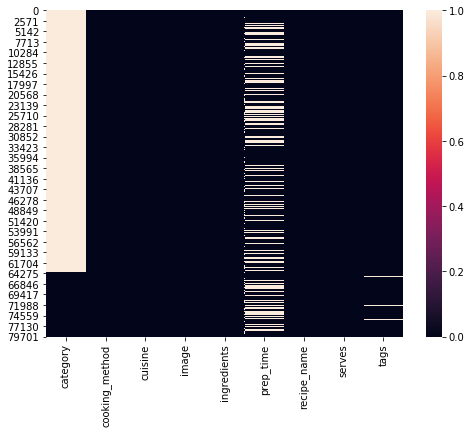

In [11]:
# Visualize the Missing Values
plt.figure(figsize=[8,6])
sns.heatmap(train.isnull())

### Data Cleaning Process

####  Data Missing Value

In [12]:
#Creating categorical feature type column

categorical_features = train.select_dtypes(include=[np.object])

categorical_features.columns


Index(['category', 'cooking_method', 'cuisine', 'image', 'ingredients',
       'prep_time', 'recipe_name', 'serves', 'tags'],
      dtype='object')

In [13]:
#Calculating total missing values percentage

total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = ((categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Feature,,
category,64138,77.984072
prep_time,23615,28.712992
tags,234,0.284516
cuisine,15,0.018238
serves,1,0.001216
recipe_name,0,0.000000
ingredients,0,0.000000
image,0,0.000000
cooking_method,0,0.000000


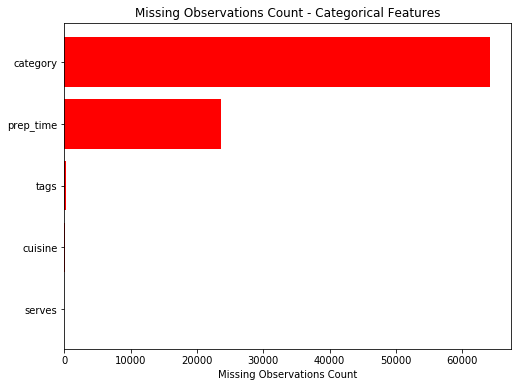

In [14]:
#ploting graph of missing value 


missing_values = categorical_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.009
fig, ax = plt.subplots(figsize=(8,6))
rects = ax.barh(ind, missing_values.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Categorical Features")
plt.show()

Calculating Missing Value per Columns 

Text(0.5, 1.0, 'Ratio of Missing Values Per Columns')

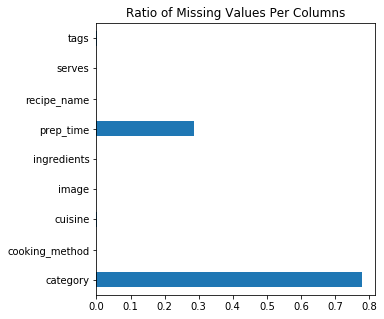

In [15]:
plt.figure(figsize=(5, 5))
train.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of Missing Values Per Columns")

In [16]:
#Missing Value count
train.isnull().sum()

category          64138
cooking_method        0
cuisine              15
image                 0
ingredients           0
prep_time         23615
recipe_name           0
serves                1
tags                234
dtype: int64

As the duplicate entries in the data set

In [17]:
print('Dupplicate Entries: {}'.format(train.duplicated().sum()))

Dupplicate Entries: 9336


In [18]:
train.drop_duplicates(inplace = True)
print('Dupplicate Entries: {}'.format(train.duplicated().sum()))

Dupplicate Entries: 0


**For the data cleanning following columns  will drop** 

**Category - The columns contain 78% missing value in the data set, so we decide to drop the column**

**Image - The columns contain some invalid image link which not importent in the data set, so we decide to drop the column**

**Prep_time - The columns contain invalid time format for 70% data, logically  the prep_time is much dependent to tags**

In [19]:
train.drop(labels = ['category', 'image','prep_time'], axis = 1, inplace = True)

In [20]:
train.head()

,cooking_method,cuisine,ingredients,recipe_name,serves,tags
0,['Set the racks in the middle and upper thirds...,['American'],"['1 tablespoons extra virgin olive oil', '1 cu...",Mediterranean Sea Bass,4 servings,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri..."
1,['Place the eggs in the air fryer basket and c...,['American'],"['4 large eggs', 'Salt (black pepper, everythi...",Air Fryer Hard Boiled Eggs,4 eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke..."
2,"['Air Fryer directions:', 'Preheat air fryer t...",['American'],"['olive oil spray', '4 about 5 ounce each salm...",Air Fryer Basil-Parmesan Salmon,4 servings,"Air Fryer Recipes, Gluten Free, Keto Recipes, ..."
3,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['American'],['1/2 cup freshly grated Parmesan (not pre-gra...,Everything Parmesan Crisps,4 servings,"Gluten Free, Keto Recipes, Kid Friendly, Low C..."
4,['Cook potatoes in a large pot of salted water...,['American'],['3 1/2 pounds new potatoes (about 10 peeled a...,Potato and Green Bean Salad,12 servings,"Dairy Free, Gluten Free, Kid Friendly, Vegetar..."


**Filling Missing Values** 

In [21]:
train['cuisine']=train['cuisine'].fillna(train['cuisine'].mode()[0])

In [22]:
train['serves']=train['serves'].fillna(train['serves'].mode()[0])

In [23]:
train['tags']=train['tags'].fillna(train['tags'].mode()[0])

In [24]:
train.isnull().sum()

cooking_method    0
cuisine           0
ingredients       0
recipe_name       0
serves            0
tags              0
dtype: int64

### EDA AND FEATURE ENGINEERING

In [25]:
for i in train.columns:
    print("Unique values in", i, train[i].nunique())

Unique values in cooking_method 62268
Unique values in cuisine 23
Unique values in ingredients 61198
Unique values in recipe_name 55838
Unique values in serves 7494
Unique values in tags 57039


In [26]:
#Plot for top Cuisine category

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

all_words = train['cuisine'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(x = all_words.index.values[1:30],y = all_words.values[1:30],
               marker= dict(colorscale='Jet',color = all_words.values[1:30]),text='Cuisine')]

layout = go.Layout(title='Top Cuisine Category')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [27]:
#Plot for the find top words in recipe name

all_words = train['recipe_name'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(x = all_words.index.values[2:50],y = all_words.values[2:50],
               marker= dict(colorscale='Jet',color = all_words.values[2:50]))]

layout = go.Layout(title='Top Words in the Recipe Name Category')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

**Creating new feature by extracting the recipe name words to find the food category as VEG or NON-VEG**

**The columns Food_Type categories food base on the recice name as 'VEG' or 'NON-VEG'**

In [28]:
train['Food_Type'] = np.where(train['recipe_name'].str.contains('(?:"Chicken|Beef|Pork|Pie|Salmon|Steak|Bacon|Ham|Duck|Shrimp|Sea|Fish|Mediterranean|Crab|Rib|Meatloaf|Halibut|Chicken)',
                                        regex=True),'Non_Veg','Veg')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000235E82DE5F8>],
      dtype=object)

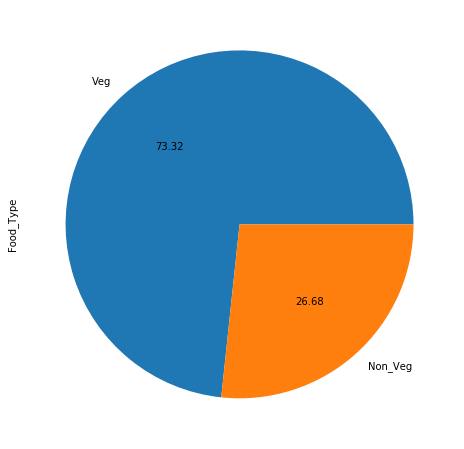

In [29]:
#Distribution of Food_Type in the data set
train.Food_Type.value_counts().plot.pie(subplots=True, figsize=(8, 8), autopct='%.2f')

**Top tags of the food recipe**

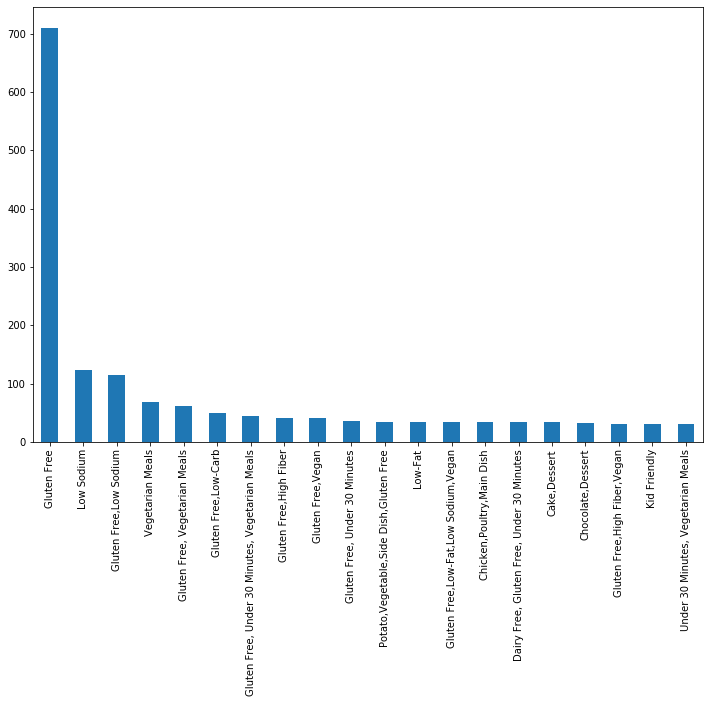

In [30]:
train.tags.value_counts().head(20).plot.bar(figsize=(12, 8))

# Modeling Technique

**Tags**

**AS the cleaning process of tags column. Furthermore, I decided to keep the 2000 most popular tags because It will be easier to predict the right tag from 2000 words than from 58000 and because we want to keep macro tags.**


In [31]:
train.head()

,cooking_method,cuisine,ingredients,recipe_name,serves,tags,Food_Type
0,['Set the racks in the middle and upper thirds...,['American'],"['1 tablespoons extra virgin olive oil', '1 cu...",Mediterranean Sea Bass,4 servings,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri...",Non_Veg
1,['Place the eggs in the air fryer basket and c...,['American'],"['4 large eggs', 'Salt (black pepper, everythi...",Air Fryer Hard Boiled Eggs,4 eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke...",Veg
2,"['Air Fryer directions:', 'Preheat air fryer t...",['American'],"['olive oil spray', '4 about 5 ounce each salm...",Air Fryer Basil-Parmesan Salmon,4 servings,"Air Fryer Recipes, Gluten Free, Keto Recipes, ...",Non_Veg
3,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['American'],['1/2 cup freshly grated Parmesan (not pre-gra...,Everything Parmesan Crisps,4 servings,"Gluten Free, Keto Recipes, Kid Friendly, Low C...",Veg
4,['Cook potatoes in a large pot of salted water...,['American'],['3 1/2 pounds new potatoes (about 10 peeled a...,Potato and Green Bean Salad,12 servings,"Dairy Free, Gluten Free, Kid Friendly, Vegetar...",Veg


In [32]:
train['tags'] = train['tags'].apply(lambda x: x.split())

In [33]:
all_tags = [item for sublist in train['tags'].values for item in sublist]

In [34]:
len(all_tags)

458415

In [35]:
#Unique_tags
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

54525

In [36]:
#Importing NLP machine learning libriry 

import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
from sklearn.cluster import KMeans


import logging

from scipy.sparse import hstack

**Creating tags fearures** 

In [37]:
flat_list = [item for sublist in train['tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(2000)
tags_features = [word[0] for word in frequencies_words]

In [38]:
tags_features

['Easy',
 'Free',
 'for',
 'Sodium',
 'Dish',
 'Recipes,Gluten',
 'Recipes',
 'Dessert',
 'a',
 'Main',
 'Side',
 'and',
 'Recipes,Main',
 'Dish,Easy',
 'Free,Low',
 'Dish,Gluten',
 'Dish,Easy,Main',
 'Free,High',
 'Lunch',
 'Crowd',
 'Cheese',
 'Recipes,Easy,Side',
 'Recipes,Dairy',
 'Fiber',
 'Recipes,Side',
 'Recipes,Shellfish',
 'Dish,Main',
 'Recipes,Recipes',
 'Gluten',
 'Sodium,Vegan',
 'Drink',
 'Free,Low-Fat,Low',
 'Recipes,Nut',
 'Crowd,Gluten',
 'Grilling',
 'Recipes,Dessert,Easy,Easy',
 'Free,Vegan',
 'de',
 'Pasta',
 'Salad',
 'Appetizer,Appetizer,Easy,Easy',
 'Free,',
 'Recipes,Grain',
 'Parties,Recipes',
 'Recipes,Egg',
 'Party,Recipes',
 'Chicken,Chicken,Easy,Poultry,Easy',
 'European',
 'Recipes,Beans',
 'Recipes,Rice',
 'Free,Low-Carb',
 'Recipes,Low',
 'Mixed',
 'Salad,Salad',
 'Dish,Sauteing',
 'Legumes,Pea',
 'Chocolate',
 'Fiber,Vegan',
 'Shrimp',
 '30',
 'Recipes,Salad',
 'Skillet',
 'Recipes,Pureeing',
 'Brunch',
 'Soup,Vegetable',
 'Dressing',
 'Dessert,Fruit',

In [39]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [40]:
train['tags'] = train['tags'].apply(lambda x: most_common(x))
train['tags'] = train['tags'].apply(lambda x: x if len(x)>0 else None)

In [41]:
train.shape

(72909, 7)

In [42]:
train.dropna(subset=['tags'], inplace=True)

## Text Processing 

**Removing html format**

**Lowering text**

**Transforming abbreviations**

**Removing punctuation**

**Lemmatizing words**

**Removing stop words**

In [43]:
train['ingredients'] = train['ingredients'].apply(lambda x: BeautifulSoup(x).get_text()) 


In [44]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [45]:
train['ingredients'] = train['ingredients'].apply(lambda x: clean_text(x))

In [46]:
token=ToktokTokenizer()

In [47]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [49]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

**Cleaning the columns**

In [50]:
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [51]:
train['ingredients'] = train['ingredients'].apply(lambda x: clean_punct(x))

In [52]:
train['ingredients'][2]

'olive oil spray 4 about 5 ounce each salmon fillets skin removed 12 lemon 14 teaspoon kosher salt freshly ground black pepper 3 tablespoons mayonnaise i like sir kensington 6 fresh basil leaves minced plus more for garnish 3 tablespoons grated parmesan or romano cheese'

In [53]:
lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


In [54]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text)
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [55]:
train['ingredients'] = train['ingredients'].apply(lambda x: lemitizeWords(x)) 
train['ingredients'] = train['ingredients'].apply(lambda x: stopWordsRemove(x)) 

In [56]:
train['cooking_method'] = train['cooking_method'].apply(lambda x: str(x))
train['cooking_method'] = train['cooking_method'].apply(lambda x: clean_text(x)) 
train['cooking_method'] = train['cooking_method'].apply(lambda x: clean_punct(x)) 
train['cooking_method'] = train['cooking_method'].apply(lambda x: lemitizeWords(x)) 
train['cooking_method'] = train['cooking_method'].apply(lambda x: stopWordsRemove(x)) 

In [57]:
train['cuisine'] = train['cuisine'].apply(lambda x: str(x))
train['cuisine'] = train['cuisine'].apply(lambda x: clean_text(x)) 
train['cuisine'] = train['cuisine'].apply(lambda x: clean_punct(x)) 
train['cuisine'] = train['cuisine'].apply(lambda x: lemitizeWords(x)) 
train['cuisine'] = train['cuisine'].apply(lambda x: stopWordsRemove(x)) 

In [58]:
train['serves'] = train['serves'].apply(lambda x: str(x))
train['serves'] = train['serves'].apply(lambda x: clean_text(x)) 
train['serves'] = train['serves'].apply(lambda x: clean_punct(x)) 
train['serves'] = train['serves'].apply(lambda x: lemitizeWords(x)) 
train['serves'] = train['serves'].apply(lambda x: stopWordsRemove(x)) 

In [59]:
train

,cooking_method,cuisine,ingredients,recipe_name,serves,tags,Food_Type
0,et rack middle upper thirds oven preheat oven ...,american,1 tablespoons extra virgin olive oil 1 cup cho...,Mediterranean Sea Bass,4 serve,"[Dairy, Free,, Gluten, Free,, Keto, Recipes,, ...",Non_Veg
1,place egg air fryer basket cook 250f 15 minute...,american,4 large egg alt black pepper everything bagel ...,Air Fryer Hard Boiled Eggs,4 egg,"[Air, Fryer, Recipes,, Dairy, Free,, Gluten, F...",Veg
2,air fryer directions preheat air fryer 400f sp...,american,olive oil spray 4 5 ounce salmon fillet skin r...,Air Fryer Basil-Parmesan Salmon,4 serve,"[Air, Fryer, Recipes,, Gluten, Free,, Keto, Re...",Non_Veg
3,preheat oven 400f pour 2 tablespoon grate chee...,american,12 cup freshly grate parmesan pre-grated use l...,Everything Parmesan Crisps,4 serve,"[Gluten, Free,, Keto, Recipes,, Kid, Friendly,...",Veg
4,cook potatoes large pot salt water tender 25 3...,american,3 12 pound new potatoes 10 peel cut 1-inch pie...,Potato and Green Bean Salad,12 serve,"[Dairy, Free,, Gluten, Free,, Kid, Friendly,, ...",Veg
...,...,...,...,...,...,...,...
82240,trim zucchini cut quarter lengthwise cut away ...,,1 14 pound zucchini 12 teaspoon salt 4 ounces ...,Zucchini with Pork and Shrimp (Bau Xao-Vietnam),serve 4,"[Wok, Recipes,Meat,Shellfish, Recipes,Main, Re...",Non_Veg
82241,whisk together lemon juice olive oil salt pepp...,,1 lemon juiced 1 tablespoon extra-virgin olive...,"Zucchini with Green Peppercorns, Lemon, and Pa...",6 serve,"[Easy, Free,Low-Carb]",Veg
82242,heat layer olive oil skillet medium high oil b...,,extra-virgin olive oil skillet 2 medium zucchi...,Zucchini with Walnut Pesto,4 serve,"[Pesto, Recipes,Nut, Recipes,Vegetable,Zucchin...",Veg
82243,medium soup pot heat olive oil add potatoes se...,,14 cup olive oil plus drizzle 1 12 pound small...,"Zucchini, Potato and Fennel Stew",4 serve,"[Make, Recipes,Main, Dish]",Veg


##  TF–IDF 

**Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document. We use it for the cooking method & its process coluns to get a weighting factor in searches of information retrieval.**

In [60]:
X1 = train['cooking_method']
X2 = train['cuisine']
X3 = train['ingredients']
X4 = train['recipe_name']
X5 = train['serves']
y = train['tags']

In [61]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [62]:
vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [63]:
vectorizer_X3 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X4 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)
vectorizer_X5 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [64]:
X1_tfidf = vectorizer_X1.fit_transform(X1)
X2_tfidf = vectorizer_X2.fit_transform(X2)
X3_tfidf = vectorizer_X1.fit_transform(X3)
X4_tfidf = vectorizer_X2.fit_transform(X4)
X5_tfidf = vectorizer_X1.fit_transform(X5)



In [65]:
X_tfidf = hstack([X1_tfidf,X2_tfidf,X3_tfidf,X4_tfidf,X5_tfidf])

## Modeling

**Creating pipeline for the diffrent modele to predict tags by evaluation method of jaccard score as its compares members for two sets to see which members are shared and which are distinct. It is the best fitted for multi label classification. We also create the hamming loss to calculate the fraction of labels that are incorrectly predicted.**  

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.3, random_state = 0)

In [67]:
def avg_jacard(y_true,y_pred):
    '''
    see https://en.wikipedia.org/wiki/Multi-label_classification#Statistics_and_evaluation_metrics
    '''
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jacard.mean()*100

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")    

In [69]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Jacard score: 2.584108416175159
Hamming loss: 0.47871226124460875
---
Clf:  SGDClassifier
Jacard score: 10.442677735219144
Hamming loss: 0.2362244656144841
---
Clf:  LogisticRegression
Jacard score: 15.734219897154993
Hamming loss: 0.2345063747097019
---
Clf:  MultinomialNB
Jacard score: 16.18681292041308
Hamming loss: 0.36428029764443814
---
Clf:  LinearSVC
Jacard score: 24.83765094424365
Hamming loss: 0.23044694061329923
---
Clf:  Perceptron
Jacard score: 20.622736345222258
Hamming loss: 0.3336793212948481
---
Clf:  PassiveAggressiveClassifier
Jacard score: 23.392916490645092
Hamming loss: 0.30652874543817243
---


As we can improve & impliment various things in this project, but as of now for the over-veiw of conceptual process I try my best things to impliment, we can upgrad skill & concept to make this project helpful for human by using Deep learning, NLP, Machine learning etc.   